
># Insurance Cost Prediction (PRCP-1021)

### Problem Statement 

> To develop a machine learning model that accurately predicts the medical insurance cost (charges) for an individual based on their demographic
> and health-related information.


### Domain Analysis

>#### 🔹  Domain: Finance

Attribute Information:

| **Attribute** | **Description**                                                                                                   |
|---------------|-------------------------------------------------------------------------------------------------------------------|
| **age**       | Age of the primary beneficiary (individual taking the insurance policy).                                          |
| **sex**       | Gender of the beneficiary - either **male** or **female**.                                                        |
| **bmi**       | Body Mass Index (BMI), a measure of body fat based on height and weight. Ideal range is **18.5 to 24.9**.         |
| **children**  | Number of children/dependents covered by the insurance policy.                                                    |
| **smoker**    | Indicates whether the person is a **smoker** or **non-smoker**.                                                   |
| **region**    | Geographic region in the US where the beneficiary resides: **northeast, southeast, southwest, northwest**.        |
| **charges**   | The **target variable** – individual medical insurance cost billed to the customer (to be **predicted**).         |
| **id**        | Unique identifier for each record/beneficiary (not used for prediction).                                          |


# Task 1: Data Analysis Report


### Import Libraries

In [2]:
import pandas as pd
import numpy as np

### Load the Dataset

In [4]:
file_path = "insurance_dataset.csv"


In [6]:

# Load the dataset
data= pd.read_csv("insurance_dataset.csv", sep=",")


In [8]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
data.shape

(1338, 7)

In [14]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Exploratory Data Analysis (EDA)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [200]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


| **Summary**  | **Description**                                                                                                                                                                                                                                                                                                              |
| ------------ | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **age**      | - Ranges from **18 to 64** years old.<br>- Mean age: **39.2**, indicating a balanced mix of young and older adults.<br>- Most policyholders fall between **27 (25th percentile)** and **51 (75th percentile)**.                                                                                                              |
| **bmi**      | - Body Mass Index ranges from **15.96 to 53.13**.<br>- Mean BMI: **30.66**, slightly above the healthy range (suggesting overweight/obese population).<br>- 75% of entries have BMI below **34.69**.                                                                                                                         |
| **children** | - Number of dependents ranges from **0 to 5**.<br>- Mean number of children: **1.09**, indicating most people have **0 to 2 children**.<br>- 50% (median) have **1 child**.                                                                                                                                                  |
| **charges**  | - Insurance charges range from **\$1,121.87 to \$63,770.43**.<br>- Mean cost: **\$13,270.42**, but high standard deviation (**\$12,110**) indicates **significant variation**.<br>- 75% of people are charged less than **\$16,639.91**, but the max shows **very high outliers**, likely due to smoking or chronic illness. |


### Univarite Analysis

### Numerical Features: age, bmi, children, charges


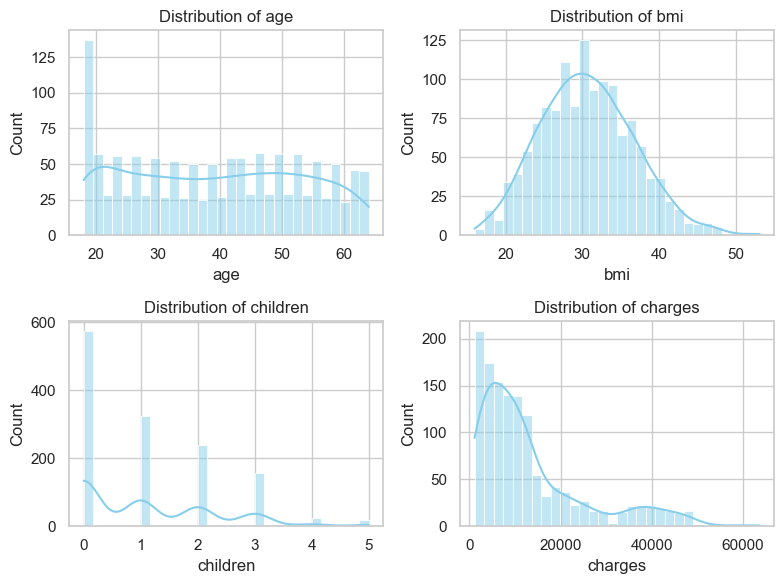

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Plot distribution for each numerical feature
num_cols = ['age', 'bmi', 'children', 'charges']

plt.figure(figsize=(8, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


| **Feature**  | **Summary**                                                 |
| ------------ | ----------------------------------------------------------- |
| **age**      | Ranges from **18 to 64** years old.                         |
| **bmi**      | Body Mass Index ranges from **15.96 to 53.13**.             |
| **children** | Number of dependents ranges from **0 to 5**.                |
| **charges**  | Insurance charges range from **\$1,121.87 to \$63,770.43**. |


### Categorical Features: sex, smoker, region



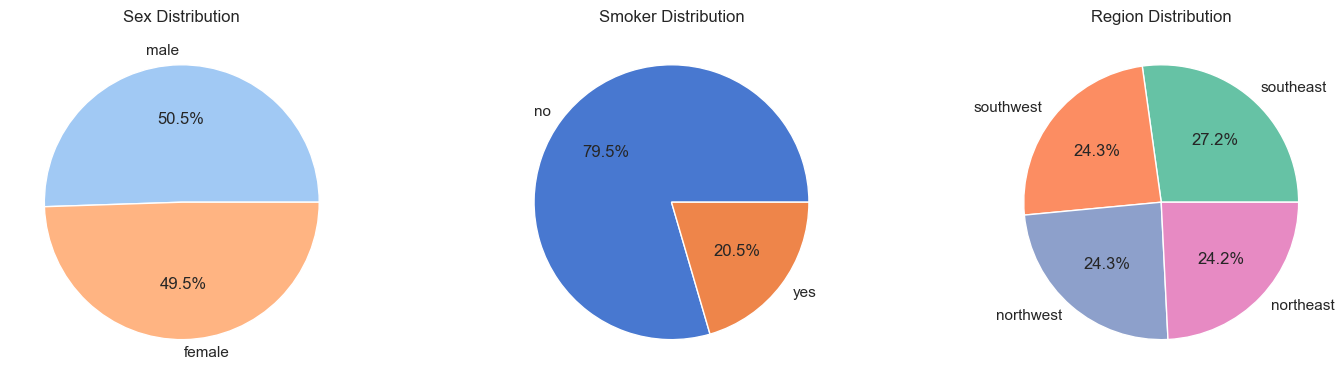

In [24]:
plt.figure(figsize=(15, 4))

# Pie chart for Sex
plt.subplot(1, 3, 1)
sex_counts = data['sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Sex Distribution')

# Pie chart for Smoker
plt.subplot(1, 3, 2)
smoker_counts = data['smoker'].value_counts()
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', colors=sns.color_palette('muted'))
plt.title('Smoker Distribution')

# Pie chart for Region
plt.subplot(1, 3, 3)
region_counts = data['region'].value_counts()
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Region Distribution')

plt.tight_layout()
plt.show()


### Bivarite Analysis 

###  Scatter Plots (Numeric vs Numeric: age & bmi vs charges)



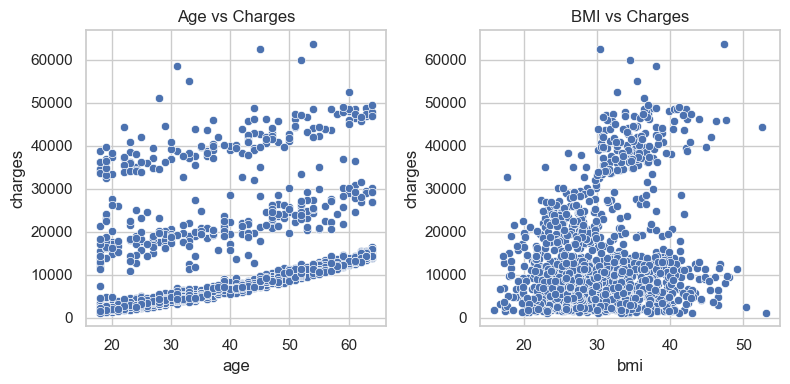

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x='age', y='charges')
plt.title('Age vs Charges')

plt.subplot(1, 3, 2)
sns.scatterplot(data=data, x='bmi', y='charges')
plt.title('BMI vs Charges')

plt.tight_layout()
plt.show()


### Charges Distribution by Sex,Smoking Status &  Region VS Charges 

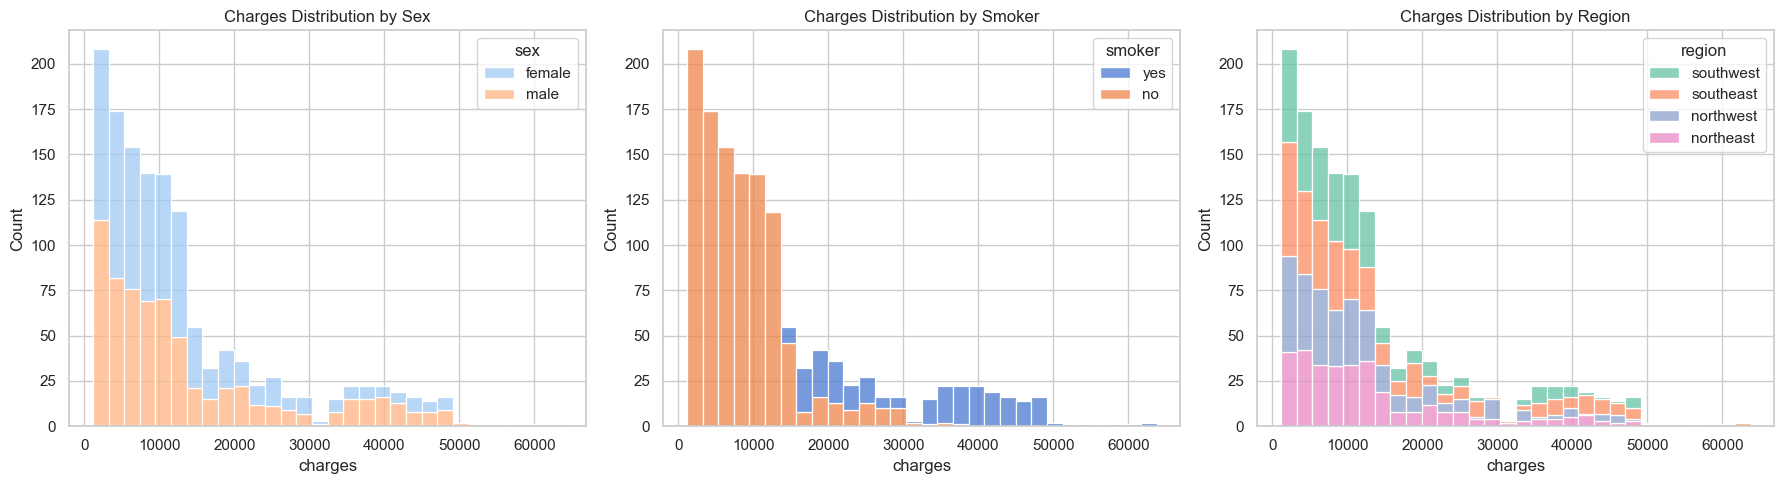

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))

# Histogram for charges by Sex
plt.subplot(1, 3, 1)
sns.histplot(data=data, x='charges', hue='sex', multiple='stack', palette='pastel', bins=30)
plt.title('Charges Distribution by Sex')

# Histogram for charges by Smoker
plt.subplot(1, 3, 2)
sns.histplot(data=data, x='charges', hue='smoker', multiple='stack', palette='muted', bins=30)
plt.title('Charges Distribution by Smoker')

# Histogram for charges by Region
plt.subplot(1, 3, 3)
sns.histplot(data=data, x='charges', hue='region', multiple='stack', palette='Set2', bins=30)
plt.title('Charges Distribution by Region')

plt.tight_layout()
plt.show()


### Density Plot

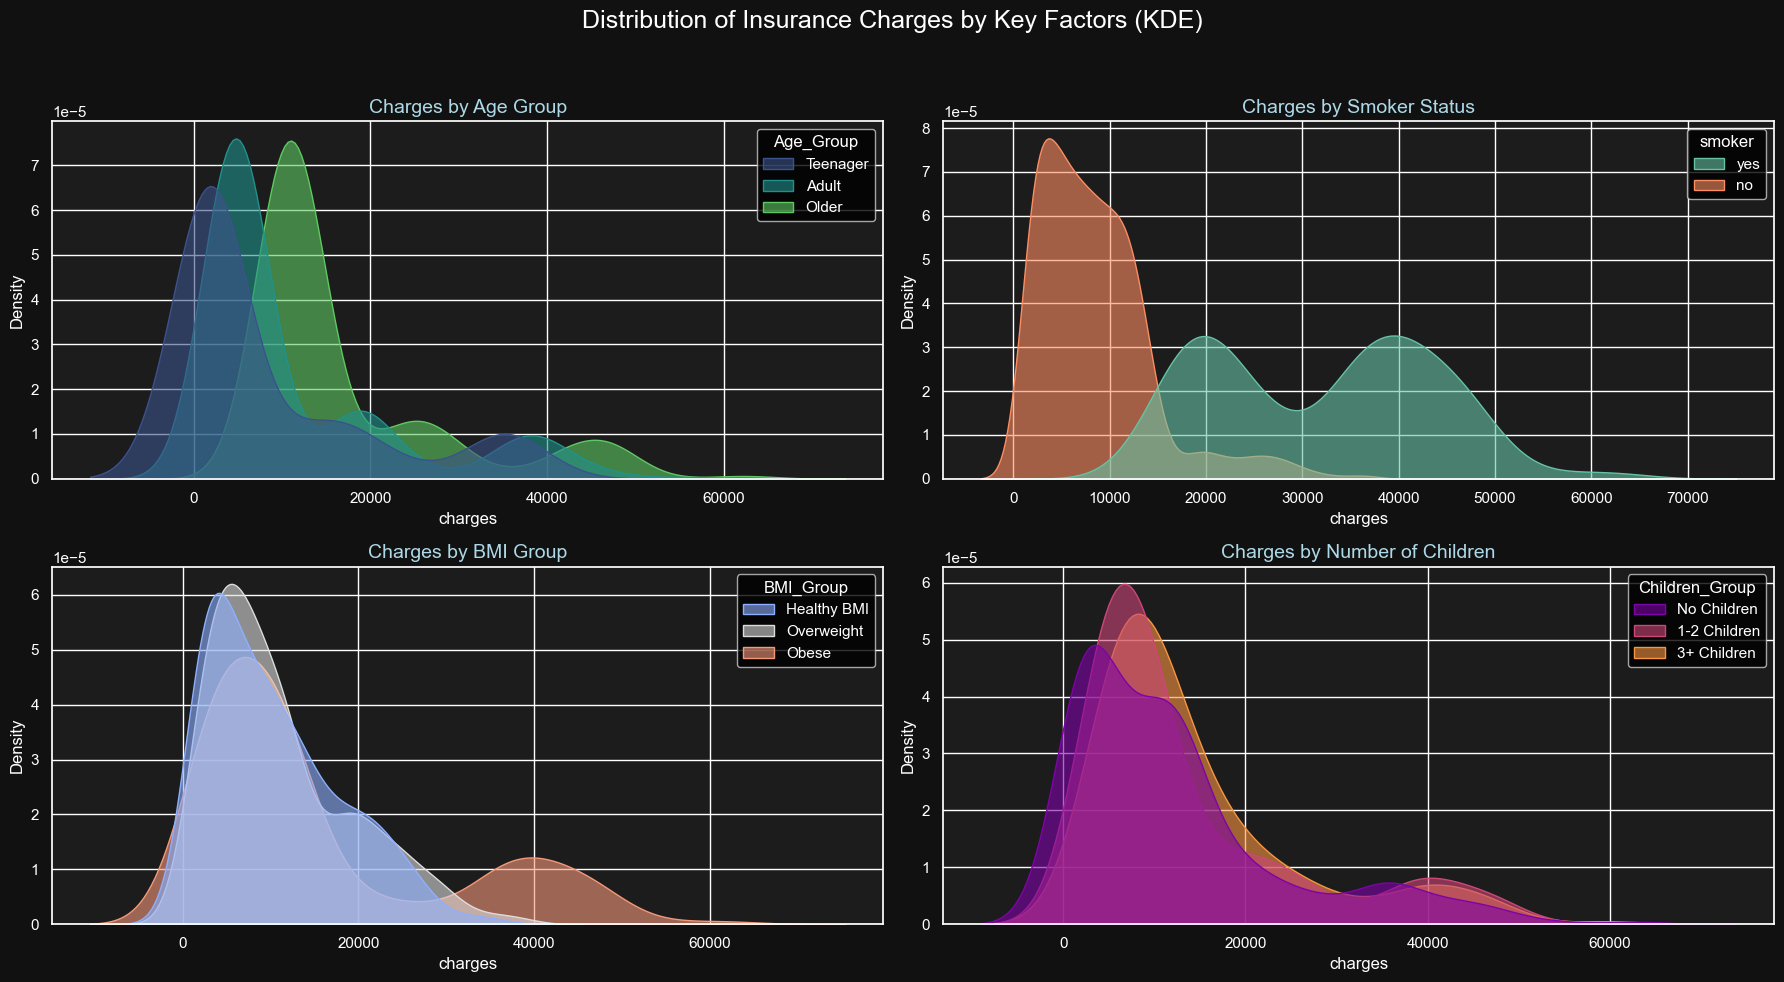

In [27]:

# Map smoker column if numeric
if data['smoker'].dtype in ['int64', 'int32', 'float64']:
    data['smoker'] = data['smoker'].map({0: 'Non-Smoker', 1: 'Smoker'})

# Drop missing values
data = data.dropna(subset=['smoker', 'charges'])

# Create groups
data['Age_Group'] = pd.cut(data['age'], bins=[0, 19, 44, 100], labels=['Teenager', 'Adult', 'Older'])
data['BMI_Group'] = pd.cut(data['bmi'], bins=[0, 24.9, 29.9, 100], labels=['Healthy BMI', 'Overweight', 'Obese'])
data['Children_Group'] = pd.cut(data['children'], bins=[-1, 0, 2, 10], labels=['No Children', '1-2 Children', '3+ Children'])

# Dark theme setup
sns.set(style="darkgrid", context='notebook')
plt.style.use('dark_background')
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

# Palette
palette_age = sns.color_palette("viridis", 3)
palette_smoker = sns.color_palette("Set2", 2)
palette_bmi = sns.color_palette("coolwarm", 3)
palette_children = sns.color_palette("plasma", 3)

# KDE Plot 1: Age Group
sns.kdeplot(data=data, x='charges', hue='Age_Group', fill=True, common_norm=False,
            palette=palette_age, alpha=0.6, ax=axes[0])
axes[0].set_title("Charges by Age Group", fontsize=14)

# KDE Plot 2: Smoker
sns.kdeplot(data=data, x='charges', hue='smoker', fill=True, common_norm=False,
            palette=palette_smoker, alpha=0.6, ax=axes[1])
axes[1].set_title("Charges by Smoker Status", fontsize=14)

# KDE Plot 3: BMI Group
sns.kdeplot(data=data, x='charges', hue='BMI_Group', fill=True, common_norm=False,
            palette=palette_bmi, alpha=0.6, ax=axes[2])
axes[2].set_title("Charges by BMI Group", fontsize=14)

# KDE Plot 4: Children Group
sns.kdeplot(data=data, x='charges', hue='Children_Group', fill=True, common_norm=False,
            palette=palette_children, alpha=0.6, ax=axes[3])
axes[3].set_title("Charges by Number of Children", fontsize=14)

# Style
for ax in axes:
    ax.set_facecolor("#1c1c1c")
    ax.tick_params(colors='white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.title.set_color('lightblue')
    legend = ax.get_legend()
    if legend:
        legend.get_title().set_color('white')
        for text in legend.get_texts():
            text.set_color('white')

fig.patch.set_facecolor("#111")
plt.suptitle("Distribution of Insurance Charges by Key Factors (KDE)", fontsize=18, color='white')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Correlation Analysis:

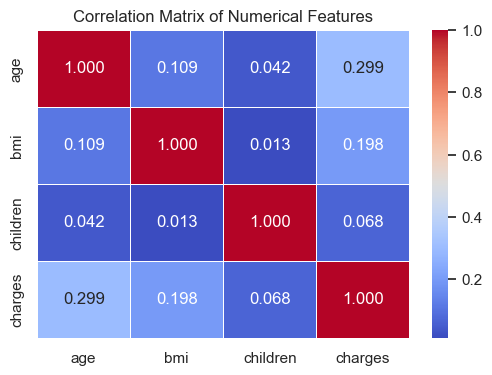

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix of numeric columns
corr = data[['age', 'bmi', 'children', 'charges']].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


### Data Cleaning and Preprocessing 

### Outliers Detection:

In [ ]:
### Use boxplots or IQR method on age, bmi, children, and charges.

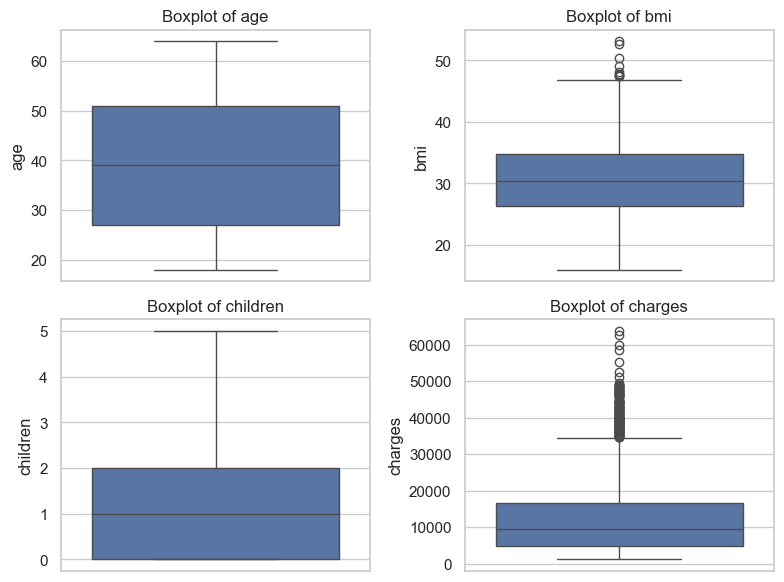

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['age', 'bmi', 'children', 'charges']

plt.figure(figsize=(8, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [36]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

bmi_outliers = detect_outliers_iqr(data, 'bmi')
charges_outliers = detect_outliers_iqr(data, 'charges')

print(f'BMI outliers count: {len(bmi_outliers)}')
print(f'Charges outliers count: {len(charges_outliers)}')


BMI outliers count: 9
Charges outliers count: 139


In [38]:
cols_with_outliers = ['bmi', 'charges']

for col in cols_with_outliers:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    data[col] = data[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


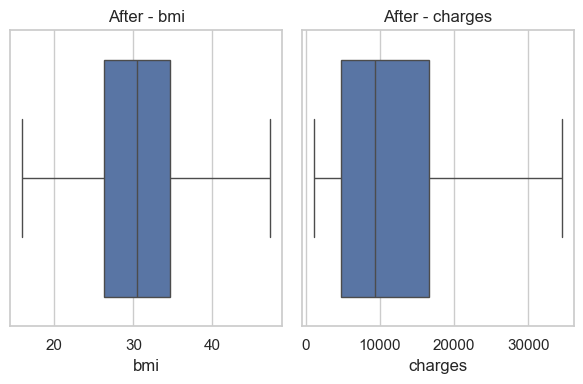

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['bmi', 'charges']

plt.figure(figsize=(6, 4))

for i, col in enumerate(cols, 1):
    plt.subplot(1, len(cols), i)
    sns.boxplot(x=data[col])
    plt.title(f'After - {col}')

plt.tight_layout()
plt.show()


### Handle Missing Values

In [44]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Preprocessing of Columns

### Label Encoding


In [48]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [211]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for binary columns
label_enc = LabelEncoder()
data['sex'] = label_enc.fit_transform(data['sex'])        # female=0, male=1
data['smoker'] = label_enc.fit_transform(data['smoker'])  # no=0, yes=1

# Label Encoding for multi-class column 'region'
region_enc = LabelEncoder()
data['region'] = region_enc.fit_transform(data['region'])  # e.g., northeast=0, northwest=1, southeast=2, southwest=3

# View the updated dataframe
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Before Transformation

| **Column** | **Sample Values**                          |
| ---------- | ------------------------------------------ |
| **sex**    | Female, Male                               |
| **smoker** | no, yes                                    |
| **region** | northeast, northwest, southeast, southwest |


### After Transformation

| **Column** | **Encoded Values (Label Encoding)**                        |
| ---------- | ---------------------------------------------------------- |
| **sex**    | 0 (Female), 1 (Male)                                       |
| **smoker** | 0 (No), 1 (Yes)                                            |
| **region** | 0 (northeast), 1 (northwest), 2 (southeast), 3 (southwest) |


In [215]:
data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523


In [54]:
data.to_csv('insurance_cleaned_data.csv', index=False)
print("Data saved successfully to 'insurance_cleaned_data.csv'")


Data saved successfully to 'insurance_cleaned_data.csv'


# Task 2: Predictive Model Implementation

### Data Splitting

In [225]:
from sklearn.model_selection import train_test_split

# Features (drop target columns)
X = data.drop(columns=['charges'])

# Target (use log_charges or charges)
y = data['charges']  # or use data['charges']

# Split data (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training features shape: (1070, 6)
Testing features shape: (268, 6)
Training target shape: (1070,)
Testing target shape: (268,)


In [227]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [229]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### StandardScaler

In [231]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [233]:

# Output the shapes to confirm
print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Training set shape: (1070, 6)
Test set shape: (268, 6)


In [235]:
X_train_scaled

array([[ 0.47222651, -1.0246016 , -1.75652513,  0.73433626, -0.50874702,
        -0.45611589],
       [ 0.54331294, -1.0246016 , -1.03308239, -0.91119211, -0.50874702,
        -1.35325561],
       [ 0.8987451 , -1.0246016 , -0.94368672, -0.91119211, -0.50874702,
         0.44102382],
       ...,
       [ 1.3252637 ,  0.97598911, -0.89153925, -0.91119211, -0.50874702,
        -1.35325561],
       [-0.16755139, -1.0246016 ,  2.82086429,  0.73433626,  1.96561348,
         1.33816354],
       [ 1.1120044 ,  0.97598911, -0.10932713, -0.91119211, -0.50874702,
         1.33816354]])

In [237]:
X_test_scaled

array([[ 0.40114007, -1.0246016 , -0.89153925,  0.73433626, -0.50874702,
        -1.35325561],
       [-0.23863782, -1.0246016 , -0.08946143, -0.91119211, -0.50874702,
        -0.45611589],
       [ 1.75178229, -1.0246016 , -0.60845296, -0.91119211,  1.96561348,
        -0.45611589],
       ...,
       [-0.09646495,  0.97598911, -0.41972876, -0.08842793, -0.50874702,
        -1.35325561],
       [ 1.04091797, -1.0246016 ,  2.78941026, -0.91119211,  1.96561348,
         0.44102382],
       [ 0.82765867, -1.0246016 ,  0.60252728, -0.08842793, -0.50874702,
         1.33816354]])

### Model Implementation 



### Logistics Regression  : 

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

LR = LinearRegression()
LR.fit(X_train_scaled, y_train)

y_pred = LR.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance on Original Charges:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")


Linear Regression Performance on Original Charges:
MSE: 23480607.26
RMSE: 4845.68
MAE: 3320.56
R²: 0.78


### Support Vector Regressor (SVR)

In [68]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

SVR_model = SVR()
SVR_model.fit(X_train_scaled, y_train)

y_pred = SVR_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Support Vector Regressor Performance on Original Charges:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")


Support Vector Regressor Performance on Original Charges:
MSE: 114268172.26
RMSE: 10689.63
MAE: 7761.07
R²: -0.05


### K-Nearest Neighbors Regressor (KNN)

In [70]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

KNN = KNeighborsRegressor()
KNN.fit(X_train_scaled, y_train)

y_pred = KNN.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("K-Nearest Neighbors Regressor Performance on Original Charges:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")


K-Nearest Neighbors Regressor Performance on Original Charges:
MSE: 22786925.33
RMSE: 4773.57
MAE: 2767.00
R²: 0.79


###  Random Forest Regressor

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

RF = RandomForestRegressor(random_state=42)
RF.fit(X_train_scaled, y_train)

y_pred = RF.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Performance on Original Charges:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")


Random Forest Performance on Original Charges:
MSE: 17670658.16
RMSE: 4203.65
MAE: 2148.17
R²: 0.84


### Gradient Boosting Regressor

In [74]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

GB = GradientBoostingRegressor(random_state=42)
GB.fit(X_train_scaled, y_train)

y_pred = GB.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regressor Performance on Original Charges:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")


Gradient Boosting Regressor Performance on Original Charges:
MSE: 16793740.70
RMSE: 4098.02
MAE: 2169.58
R²: 0.85


### XGBoost Regressor

In [76]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

XGB = xgb.XGBRegressor(random_state=42, eval_metric='rmse')
XGB.fit(X_train_scaled, y_train)

y_pred = XGB.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Regressor Performance on Original Charges:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")


XGBoost Regressor Performance on Original Charges:
MSE: 22048144.28
RMSE: 4695.55
MAE: 2606.08
R²: 0.80


### Decision Tree Regressor 

In [78]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)

y_pred = dt.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regressor Performance:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")


Decision Tree Regressor Performance:
MSE: 31208871.32
RMSE: 5586.49
MAE: 2311.70
R²: 0.71


Summary : -

| **Model**                    | **RMSE** | **MAE** | **R²** | **Comments**                                |
| ---------------------------- | -------- | ------- | ------ | ------------------------------------------- |
| **Linear Regression**        | 4845.68  | 3320.56 | 0.78   | Good baseline                               |
| **Support Vector Regressor** | 10689.63 | 7761.07 | -0.05  | Poor fit, possibly underfitting             |
| **K-Nearest Neighbors**      | 4773.57  | 2767.00 | 0.79   | Slightly better than Linear Regression      |
| **Random Forest**            | 4223.16  | 2170.62 | 0.84   | Strong performance, robust model            |
| **Gradient Boosting**        | 4098.01  | 2169.55 | 0.85   | Best performance overall                    |
| **XGBoost**                  | 4695.55  | 2606.08 | 0.80   | Good, but slightly behind Gradient Boosting |
| **Decision Tree**            | 5731.19  | 2387.23 | 0.70   | Overfits, weaker generalization             |


### Hyperparmeters Tunning 

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Define parameter grids for each model
param_grids = {
    'LinearRegression': {},  # no hyperparams to tune typically

    'SVR': {
        'kernel': ['rbf', 'linear'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    },

    'KNeighborsRegressor': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  # Manhattan and Euclidean distances
    },

    'RandomForestRegressor': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },

    'GradientBoostingRegressor': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },

    'XGBRegressor': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 1.0]
    },

    'DecisionTreeRegressor': {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
}

# Instantiate models
models = {
    'LinearRegression': LinearRegression(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42, eval_metric='rmse'),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42)
}

# Run GridSearchCV for each model
best_models = {}
for name, model in models.items():
    print(f"Running GridSearchCV for {name} ...")
    grid = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
    grid.fit(X_train_scaled, y_train)  # assuming X_train_scaled and y_train are defined
    best_models[name] = grid.best_estimator_
    print(f"Best params for {name}: {grid.best_params_}\n")

# After this, you can evaluate the best models on test set using:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

for name, best_model in best_models.items():
    y_pred = best_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"--- {name} Performance Report ---")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R²): {r2:.2f}\n")


Running GridSearchCV for LinearRegression ...
Best params for LinearRegression: {}

Running GridSearchCV for SVR ...
Best params for SVR: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

Running GridSearchCV for KNeighborsRegressor ...
Best params for KNeighborsRegressor: {'n_neighbors': 9, 'p': 2, 'weights': 'distance'}

Running GridSearchCV for RandomForestRegressor ...
Best params for RandomForestRegressor: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}

Running GridSearchCV for GradientBoostingRegressor ...
Best params for GradientBoostingRegressor: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

Running GridSearchCV for XGBRegressor ...
Best params for XGBRegressor: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}

Running GridSearchCV for DecisionTreeRegressor ...
Best params for DecisionTreeRegressor: {'max_depth': 5, 'min_samples_split': 5}

--- LinearRegression Performance Report ---
Mean Squared Error (MSE): 23480607

### Hyperparmeter Comparsion Table

| **Model**                    | **RMSE Before** | **RMSE After** | **R² Before** | **R² After** | **Comments**                         |
| ---------------------------- | --------------- | -------------- | ------------- | ------------ | ------------------------------------ |
| **Linear Regression**        | 4845.68         | 4845.68        | 0.78          | 0.78         | Baseline, no change                  |
| **Support Vector Regressor** | 10689.63        | 6626.29        | -0.05         | 0.60         | Significant improvement after tuning |
| **K-Nearest Neighbors**      | 4773.57         | 4611.77        | 0.79          | 0.80         | Slight improvement                   |
| **Random Forest**            | 4223.16         | 4168.64        | 0.84          | 0.84         | Marginal improvement                 |
| **Gradient Boosting**        | 4098.01         | 4079.49        | 0.85          | 0.85         | Slight improvement                   |
| **XGBoost**                  | 4695.55         | 4041.65        | 0.80          | 0.85         | Good improvement                     |
| **Decision Tree**            | 5731.19         | 4261.98        | 0.70          | 0.83         | Substantial improvement after tuning |


### Summarry  

XGBoost showed the best improvement with R² increasing from 0.80 to 0.85 and lower RMSE.

XGBoost and Gradient Boosting are the best models

# Task 3: Pipeline Creation and Model Evaluation


### Automate pipeline 

### Import Required Libraries

In [294]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
import pickle


### Load Insurance Dataset

In [297]:
data = pd.read_csv('insurance_dataset.csv')


### Handle Outliers 

In [301]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

for col in ['bmi', 'charges']:
    data = cap_outliers(data, col)


### Define Features and Target Variable

In [304]:
X = data.drop(columns=['charges'])
y = data['charges']


### Convert Categorical Variables to Strings

In [306]:
categorical_features = ['sex', 'smoker', 'region']
for col in categorical_features:
    X[col] = X[col].astype(str)


### Split Data into Training and Test Sets

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Build Preprocessing Pipeline

In [314]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['age', 'bmi', 'children']),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])


### Create a Custom Transformer

In [318]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# --- 7. Custom transformer for categorization and explanation ---
class CategorizeAndExplain(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    # Categorization logic based on predicted charge and input features
    def categorize_charge_with_reason(self, charge, age, smoker, bmi, children):
        # Charge level
        if charge < 5000:
            category = 'Low Charges'
        elif charge < 15000:
            category = 'Moderate Charges'
        else:
            category = 'High Charges'

        # Age group
        if 10 <= age <= 19:
            age_desc = "Teenager"
        elif 20 <= age <= 44:
            age_desc = "Adult"
        else:
            age_desc = "Older"

        # Smoker status
        smoker_desc = "Smoker" if smoker == '1' or smoker == 1 else "Non-smoker"

        # BMI interpretation
        if bmi < 25:
            bmi_desc = "Healthy BMI"
        elif bmi < 30:
            bmi_desc = "Slightly elevated BMI"
        else:
            bmi_desc = "High BMI"

        # Children category
        if children == 0:
            child_desc = "No children"
        elif children <= 2:
            child_desc = "2 children"
        else:
            child_desc = "More than 2 children"

        return category, age_desc, smoker_desc, bmi_desc, child_desc

    # Interpret charge percentage
    def charge_percentage_reason(self, charge_pct):
        pct = int(charge_pct.strip('%'))
        if pct <= 10:
            return "Low healthcare cost | very healthy or low risk."
        elif pct <= 30:
            return "Mostly healthy | low minor risks"
        elif pct <= 50:
            return "Moderate care needed | minor risks."
        elif pct <= 70:
            return "Higher care needs | high risk."
        else:
            return "Major healthcare needs | serious risk."

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        df = X.copy()

        if 'Predicted_Charge' not in df.columns:
            raise ValueError("Input must contain 'Predicted_Charge' column")

        # Apply categorization logic row-wise
        categories_reasons = df.apply(
            lambda row: self.categorize_charge_with_reason(
                row['Predicted_Charge'],
                row['age'],
                row['smoker'],
                row['bmi'],
                row['children']
            ),
            axis=1,
            result_type='expand'
        )
        categories_reasons.columns = ['Charge_Category', 'Age_Group', 'Smoker_Status', 'BMI_Status', 'Children_Status']

        # Concatenate new explanation columns
        df = pd.concat([df, categories_reasons], axis=1)

        # Calculate percentage of predicted charge relative to the max
        max_charge = df['Predicted_Charge'].max()
        df['Charge_Percentage'] = ((df['Predicted_Charge'] / max_charge) * 100).round().astype(int).astype(str) + '%'

        # Add explanation based on charge percentage
        df['Reason'] = df['Charge_Percentage'].apply(self.charge_percentage_reason)

        return df


 ### Create a Custom Pipeline with Explanation Layer

In [321]:
class PredictionWithExplanationPipeline(Pipeline):
    def predict(self, X):
        preds = super().predict(X)
        df = X.copy()
        df['Predicted_Charge'] = preds
        explainer = CategorizeAndExplain()
        return explainer.transform(df)


### Defining the Full Pipeline (Preprocessing + Model)

In [326]:
pipe_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        n_estimators=200,
        max_depth=4,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])


### Wrap Model 

In [329]:
pipe = PredictionWithExplanationPipeline(steps=pipe_model.steps)


### Train the Model

In [332]:
pipe.fit(X_train, y_train)


PredictionWithExplanationPipeline(steps=[('preprocessor',
                                          ColumnTransformer(transformers=[('num',
                                                                           StandardScaler(),
                                                                           ['age',
                                                                            'bmi',
                                                                            'children']),
                                                                          ('cat',
                                                                           OneHotEncoder(handle_unknown='ignore'),
                                                                           ['sex',
                                                                            'smoker',
                                                                            'region'])])),
                                         ('regressor',
                                          XGBRegressor(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=0.8...
                                                       feature_weights=None,
                                                       gamma=None,
                                                       grow_policy=None,
                                                       importance_type=None,
                                                       interaction_constraints=None,
                                                       learning_rate=0.1,
                                                       max_bin=None,
                                                       max_cat_threshold=None,
                                                       max_cat_to_onehot=None,
                                                       max_delta_step=None,
                                                       max_depth=4,
                                                       max_leaves=None,
                                                       min_child_weight=None,
                                                       missing=nan,
                                                       monotone_constraints=None,
                                                       multi_strategy=None,
                                                       n_estimators=200,
                                                       n_jobs=None,
                                                       num_parallel_tree=None, ...))])

### Save the Trained Pipeline

In [360]:

with open('insurance_pipeline_with_explainer.pkl', 'wb') as f:
    pickle.dump(pipe, f)

print("Pipeline saved successfully as 'insurance_pipeline_with_explainer.pkl'")


Pipeline saved successfully as 'insurance_pipeline_with_explainer.pkl'


### Predictions 

In [340]:
df_with_explanations = pipe.predict(X_test)


In [354]:
df_with_explanations.head(10)

,age,sex,bmi,children,smoker,region,Predicted_Charge,Charge_Category,Age_Group,Smoker_Status,BMI_Status,Children_Status,Charge_Percentage,Reason
764,45,female,25.175,2,no,northeast,11973.089844,Moderate Charges,Older,Non-smoker,Slightly elevated BMI,2 children,32%,Moderate care needed | minor risks.
887,36,female,30.020,0,no,northwest,5615.336426,Moderate Charges,Adult,Non-smoker,High BMI,No children,15%,Mostly healthy | low minor risks
890,64,female,26.885,0,yes,northwest,31930.724609,High Charges,Older,Non-smoker,Slightly elevated BMI,No children,85%,Major healthcare needs | serious risk.
1293,46,male,25.745,3,no,northwest,10244.551758,Moderate Charges,Older,Non-smoker,Slightly elevated BMI,More than 2 children,27%,Mostly healthy | low minor risks
259,19,male,31.920,0,yes,northwest,31948.386719,High Charges,Teenager,Non-smoker,High BMI,No children,85%,Major healthcare needs | serious risk.
1312,34,male,42.900,1,no,southwest,6554.707520,Moderate Charges,Adult,Non-smoker,High BMI,2 children,17%,Mostly healthy | low minor risks
899,19,female,22.515,0,no,northwest,2277.334717,Low Charges,Teenager,Non-smoker,Healthy BMI,No children,6%,Low healthcare cost | very healthy or low risk.
752,64,male,37.905,0,no,northwest,17571.888672,High Charges,Older,Non-smoker,High BMI,No children,47%,Moderate care needed | minor risks.
1286,28,female,17.290,0,no,northeast,5565.258301,Moderate Charges,Adult,Non-smoker,Healthy BMI,No children,15%,Mostly healthy | low minor risks
707,49,male,28.690,3,no,northwest,10255.685547,Moderate Charges,Older,Non-smoker,Slightly elevated BMI,More than 2 children,27%,Mostly healthy | low minor risks


>### Predication For New dataset Using PKL file 

In [440]:
import pandas as pd
import pickle

# --- 1. Load the saved pipeline ---
with open('insurance_pipeline_with_explainer.pkl', 'rb') as f:
    pipe = pickle.load(f)

# --- 2. Load new dataset from file path ---
file_path = 'synthetic_prediction_input.csv'  # <-- Change new CSV file
data = pd.read_csv(file_path)

# --- 3. Convert categorical features to string (same as training) ---
categorical_features = ['sex', 'smoker', 'region']
for col in categorical_features:
    data[col] = data[col].astype(str)

# --- 4. Predict with explanations ---
df_with_explanations = pipe.predict(data)

# --- 5. Show output ---
df_with_explanations.head(5)


,age,sex,bmi,children,smoker,region,Predicted_Charge,Charge_Category,Age_Group,Smoker_Status,BMI_Status,Children_Status,Charge_Percentage,Reason
0,56,0,26.67,1,1,2,24657.712891,High Charges,Older,Smoker,Slightly elevated BMI,2 children,60%,Higher care needs | high risk.
1,46,1,41.29,2,0,1,31839.589844,High Charges,Older,Non-smoker,High BMI,2 children,78%,Major healthcare needs | serious risk.
2,32,1,21.31,4,1,3,16881.023438,High Charges,Adult,Smoker,Healthy BMI,More than 2 children,41%,Moderate care needed | minor risks.
3,60,1,16.81,4,0,3,27584.951172,High Charges,Older,Non-smoker,Healthy BMI,More than 2 children,67%,Higher care needs | high risk.
4,25,0,32.64,3,0,2,32103.005859,High Charges,Adult,Non-smoker,High BMI,More than 2 children,78%,Major healthcare needs | serious risk.


###  For new datasets, why convert categorical columns to strings before prediction?

 >The pipeline does the encoding, but it does NOT convert types for you automatically.

 >input data must be in the expected format and types.

 >So, converting categorical columns to strings before passing to pipeline is necessary if the new data is not already in that format.


### Predication for Single Entry data 

In [369]:
import pandas as pd
import pickle

# --- 1. Load the saved pipeline ---
with open('insurance_pipeline_with_explainer.pkl', 'rb') as f:
    pipe = pickle.load(f)

# --- 2. Prepare 10 new input rows as DataFrame ---
new_data = pd.DataFrame([
    {'age': 45, 'sex': '1', 'bmi': 28.5, 'children': 2, 'smoker': '0', 'region': '3'},
    {'age': 30, 'sex': '0', 'bmi': 24.0, 'children': 1, 'smoker': '1', 'region': '2'},
    {'age': 52, 'sex': '1', 'bmi': 31.0, 'children': 3, 'smoker': '0', 'region': '1'},
    {'age': 23, 'sex': '0', 'bmi': 26.7, 'children': 0, 'smoker': '0', 'region': '3'},
    {'age': 40, 'sex': '1', 'bmi': 29.9, 'children': 2, 'smoker': '1', 'region': '2'},
    {'age': 36, 'sex': '0', 'bmi': 22.5, 'children': 1, 'smoker': '0', 'region': '1'},
    {'age': 55, 'sex': '1', 'bmi': 33.2, 'children': 4, 'smoker': '1', 'region': '3'},
    {'age': 48, 'sex': '0', 'bmi': 27.0, 'children': 0, 'smoker': '0', 'region': '2'},
    {'age': 29, 'sex': '1', 'bmi': 25.3, 'children': 3, 'smoker': '1', 'region': '1'},
    {'age': 50, 'sex': '0', 'bmi': 30.5, 'children': 2, 'smoker': '0', 'region': '3'}
])

# --- 3. Use pipeline to predict with explanations ---
result = pipe.predict(new_data)

# --- 4. Show predictions and explanations ---
result.head(10)


,age,sex,bmi,children,smoker,region,Predicted_Charge,Charge_Category,Age_Group,Smoker_Status,BMI_Status,Children_Status,Charge_Percentage,Reason
0,45,1,28.5,2,0,3,25413.011719,High Charges,Older,Non-smoker,Slightly elevated BMI,2 children,76%,Major healthcare needs | serious risk.
1,30,0,24.0,1,1,2,16597.433594,High Charges,Adult,Smoker,Healthy BMI,2 children,49%,Moderate care needed | minor risks.
2,52,1,31.0,3,0,1,31813.384766,High Charges,Older,Non-smoker,High BMI,More than 2 children,95%,Major healthcare needs | serious risk.
3,23,0,26.7,0,0,3,19188.187500,High Charges,Adult,Non-smoker,Slightly elevated BMI,No children,57%,Higher care needs | high risk.
4,40,1,29.9,2,1,2,25876.136719,High Charges,Adult,Smoker,Slightly elevated BMI,2 children,77%,Major healthcare needs | serious risk.
5,36,0,22.5,1,0,1,18681.777344,High Charges,Adult,Non-smoker,Healthy BMI,2 children,56%,Higher care needs | high risk.
6,55,1,33.2,4,1,3,33614.667969,High Charges,Older,Smoker,High BMI,More than 2 children,100%,Major healthcare needs | serious risk.
7,48,0,27.0,0,0,2,24134.134766,High Charges,Older,Non-smoker,Slightly elevated BMI,No children,72%,Major healthcare needs | serious risk.
8,29,1,25.3,3,1,1,18265.662109,High Charges,Adult,Smoker,Slightly elevated BMI,More than 2 children,54%,Higher care needs | high risk.
9,50,0,30.5,2,0,3,31843.091797,High Charges,Older,Non-smoker,High BMI,2 children,95%,Major healthcare needs | serious risk.


>### Descriptive Summary

### Factors and Their Relationship in predication 

| **Factor**   | **Description**                           | **Role in Insurance Charges**                                                                                                                 |
| ------------ | ----------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------- |
|**age**      | Age of the individual (in years)          | Older individuals generally have higher healthcare costs due to increased medical needs, chronic conditions, and aging-related issues.        |
| **bmi**      | Body Mass Index                           | High BMI (especially >30) is linked to obesity-related conditions (diabetes, hypertension), leading to higher predicted insurance charges.    |
| **children** | Number of children/dependents             | Having dependents may slightly increase expected healthcare use and charges, though impact is moderate.                                       |
| **sex**      | Biological sex (male/female)              | Gender may cause small differences in healthcare utilization but is usually a minor factor.                                                   |
| **smoker**   | Smoking status (yes/no)                   | **Strong predictor** — Smokers are at higher risk for diseases like cancer and heart disease, resulting in **much higher insurance charges**. |
| **region**   | Residential region (northeast/south/etc.) | Region influences healthcare pricing due to local costs, hospital access, and provider charges.                                               |


### Factors Influence Insurance Charges

| **Factor**        | **Condition**        | **Impact on Charges** | **Reason**                                                          |
| ----------------- | -------------------- | --------------------- | ------------------------------------------------------------------- |
| **Age**           | Teenager (10–19)     | Low to Moderate       | Typically fewer medical needs.                                      |
|                   | Adult (20–44)        | Moderate              | Some health risks begin to emerge.                                  |
|                   | Older (45–80)        | Moderate to High      | Increased risk of chronic conditions and age-related issues.        |
| **Smoker Status** | Non-Smoker           | Low to Moderate       | Lower health risks, especially related to lungs and heart.          |
|                   | Smoker               | **Very High**         | Strong predictor of serious diseases (e.g., cancer, heart disease). |
| **BMI**           | Healthy (<25)        | Low                   | Normal weight, low obesity-related risk.                            |
|                   | Overweight (25–29.9) | Moderate              | Increased risk of hypertension, diabetes.                           |
|                   | Obese (30+)          | High                  | High risk for chronic illnesses and complications.                  |
| **Children**      | 0 children           | Lower                 | Fewer dependents, lower family healthcare usage.                    |
|                   | 1–2 children         | Slightly Higher       | Mild increase due to dependents' healthcare needs.                  |
|                   | 3 or more children   | Moderate Increase     | More dependents, potentially higher healthcare costs.               |


### predicted insurance charges & Risk Level

| **Charge Range (USD)** | **Charge Category** | **Description**                                                                                         | **Risk Level** |
| ---------------------- | ------------------- | ------------------------------------------------------------------------------------------------------- | -------------- |
| 0 – 4,999              | Low Charges         | Minimal healthcare needs; generally healthy individuals with low predicted costs.                       | Low risk       |
| 5,000 – 14,999         | Moderate Charges    | Moderate healthcare usage; may have some health issues or risks requiring periodic care.                | Medium risk    |
| 15,000 and above       | High Charges        | High predicted healthcare costs due to serious conditions or high-risk factors like smoking or obesity. | High risk      |


### Summary :- 

>Charges increase with age, smoking, higher BMI, and number of children.

>Smoking and high BMI have the strongest influence on pushing charges into the High category.

>Teenagers and non-smokers with healthy BMI are often in the Low charge bracket.

| **Category**                         | **Distance-Based Algorithms**                                                                                | **Non-Distance-Based Algorithms**                                                                                                                                                                                                                  |
| ------------------------------------ | ------------------------------------------------------------------------------------------------------------ | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Definition**                       | Algorithms that calculate distances between data points (e.g., Euclidean, Manhattan).                        | Algorithms that don’t rely on distances but use probabilities, trees, or gradients.                                                                                                                                                                |
| **Algorithms**                       | - **K-Nearest Neighbors (KNN)**<br>- **K-Means Clustering**<br>- **Hierarchical Clustering**<br>- **DBSCAN** | - **Linear Regression**<br>- **Logistic Regression**<br>- **Support Vector Machines (SVM)**<br>- **Principal Component Analysis (PCA)**<br>- **Decision Trees**<br>- **Random Forest**<br>- **Gradient Boosting Models (e.g., XGBoost, LightGBM)** |
| **Scaling Required?**                | Always (Normalization is often preferred).                                                                   | Usually required (Standardization is common).                                                                                                                                                                                                      |
| **Use Case**                         | - Works with features in different units or scales.<br>- Sensitive to magnitudes of data points.             | - Works with structured and linearly separable data.<br>- Sensitive to variance and normal distribution.                                                                                                                                           |
| **Examples of Distance Metric Used** | - Euclidean Distance<br>- Manhattan Distance<br>- Cosine Similarity                                          | Not applicable.                                                                                                                                                                                                                                    |
| **Preferred Scaling Method**         | Normalization (scales values to \[0, 1] or \[-1, 1]).                                                        | Standardization (scales values to mean 0 and std dev 1).                                                                                                                                                                                           |
